<a href="https://colab.research.google.com/github/JorgeCruz02/Medbot/blob/main/TRANSFERENCIADEAPRENDIZAJE/Ejercicio_transferencia_de_datos_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ImageDataGenerator


In [ ]:
#import el modelo de interes
from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.aplications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Setup Data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = '/content/drive/MyDrive/DataSet 2024/dataset_bueno/entrenamiento'
test_dir = '/content/drive/MyDrive/DataSet 2024/dataset_bueno/prueba'

train_datagen = ImageDataGenerator(rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    rescale=1/255.)
test_datagen = ImageDataGenerator(rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    rescale=1/255.)

print("Training Images: ")
train_data = train_datagen.flow_from_directory(train_dir, target_size=IMAGE_SIZE, batch_size = BATCH_SIZE, class_mode="categorical")
print("Testing Images: ")
test_data = train_datagen.flow_from_directory(test_dir, target_size=IMAGE_SIZE, batch_size = BATCH_SIZE, class_mode="categorical")

Training Images: 
Found 250 images belonging to 5 classes.
Testing Images: 
Found 250 images belonging to 5 classes.


In [ ]:
ings, labels = next(train_data)

In [ ]:
labels.shape

(32, 5)

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

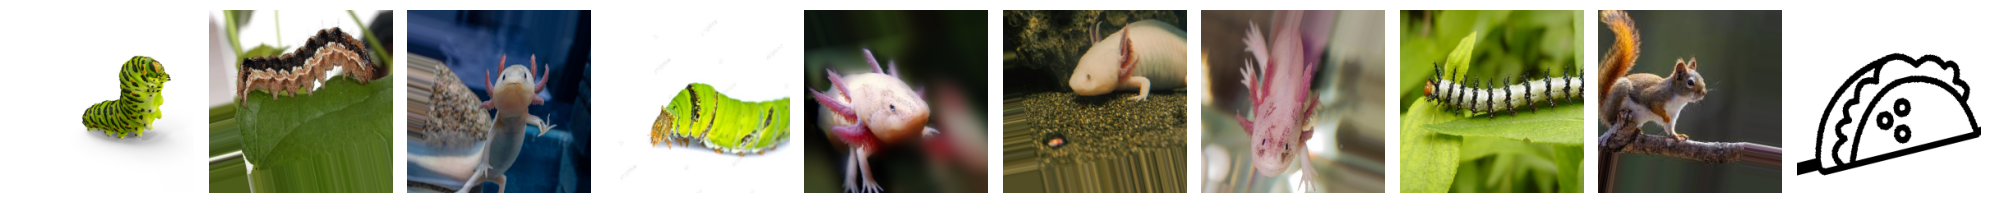

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
plotImages(ings)
print(labels)
#Etiquetas
#0=ajolote
#1=ardilla
#2=cubrebocas
#3=orugas
#4=tacos

In [ ]:
#Al cargar un modelo dado, el argumento "include_top" se puede establecer se puede establecer en False, en cuyo caso  las capas de salida
#totalmente conectadas (DENSE) del modelo utilizando para hacer predicciones no se cargarán, esto permite agregar y entrenar
#una nueva capa de salida
pre_trained_model = VGG16(input_shape=IMAGE_SIZE+(3,), weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
#Se debe congelar el modelo base, es decir no se ajuestaran los valores de los pesos del modelo base
pre_trained_model.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Agregar nuevas capas utlizando la API funcional de KERAS
x = Flatten()(pre_trained_model.output)
x = Dense(2048, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
# x = Dense(128, activation='relu')(x)
x = Dense(16, activation='sigmoid')(x)
predicciones = Dense(5, activation='softmax')(x)

In [ ]:
# Crear modelo
modelo = Model(inputs=pre_trained_model.input, outputs=predicciones)
modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Compilar modelo
modelo.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
import os

for filename in os.listdir("/content/drive/MyDrive/DataSet 2024/dataset_bueno/prueba"):
    extension = filename.split(".")[-1]
    print(extension)

ardillas
tacos
ajolotes
orugas
cubrebocas


In [ ]:
#Entrenan modelo
history = modelo.fit(train_data, validation_data=test_data, epochs=70, batch_size=100)

Epoch 1/70
8/8 [==============================] - 366s 47s/step - loss: 1.6379 - accuracy: 0.2200 - val_loss: 1.5452 - val_accuracy: 0.3080
Epoch 2/70
8/8 [==============================] - 13s 2s/step - loss: 1.5418 - accuracy: 0.2760 - val_loss: 1.4818 - val_accuracy: 0.4120
Epoch 3/70
8/8 [==============================] - 13s 2s/step - loss: 1.4639 - accuracy: 0.3760 - val_loss: 1.3887 - val_accuracy: 0.5000
Epoch 4/70
8/8 [==============================] - 14s 2s/step - loss: 1.3786 - accuracy: 0.4480 - val_loss: 1.3481 - val_accuracy: 0.4960
Epoch 5/70
8/8 [==============================] - 13s 2s/step - loss: 1.3258 - accuracy: 0.5160 - val_loss: 1.3482 - val_accuracy: 0.5480
Epoch 6/70
8/8 [==============================] - 17s 2s/step - loss: 1.2972 - accuracy: 0.4960 - val_loss: 1.2007 - val_accuracy: 0.7160
Epoch 7/70
8/8 [==============================] - 13s 2s/step - loss: 1.1859 - accuracy: 0.6640 - val_loss: 1.1486 - val_accuracy: 0.7320
Epoch 8/70
8/8 [================

In [ ]:
#Guardar el modelo en formato HDF5
from keras.models import save_model
modelo.save('./vgg16.h5')
#crear carpeta
!mkdir carpeta_salida
!tensorflowjs_converter --input_format keras vgg16.h5 carpeta_salida
!ls carpeta_salida

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


mkdir: cannot create directory ‘carpeta_salida’: File exists
/bin/bash: line 1: tensorflowjs_converter: command not found


In [ ]:
from tensorflow.keras.preprocessing import image
img_path = '/content/drive/MyDrive/DataSet 2024/dataset_bueno/prueba/orugas/001 (11).jpg'

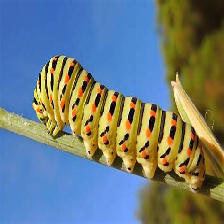

In [ ]:
img = image.load_img(img_path, target_size=(224,224))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)


In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
X = preprocess_input(x)
preds = modelo.predict(X)

1/1 [==============================] - 1s 1s/step


In [ ]:
preds.shape

(1, 5)

In [ ]:
preds

array([[0.01089951, 0.05208841, 0.01713646, 0.85245275, 0.06742295]],
      dtype=float32)

In [ ]:
np.argmax(preds, axis=1)

array([3])

In [ ]:
imgs, labels = next(test_data)


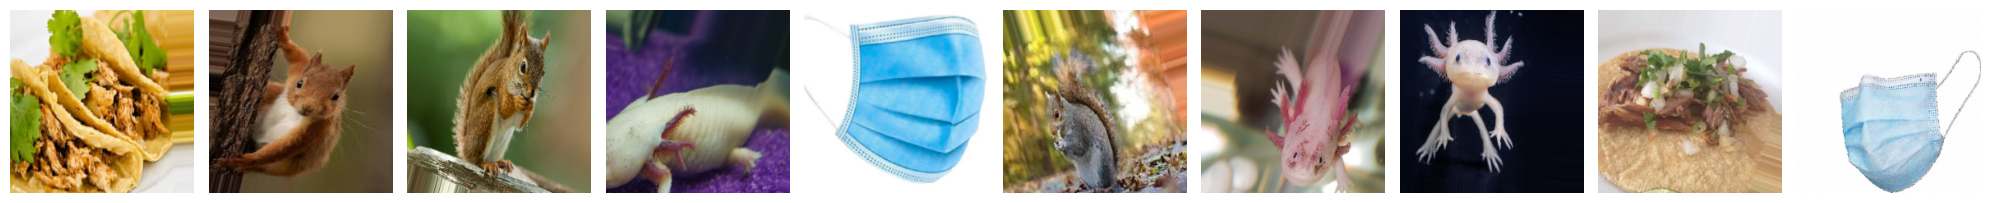

[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)
# Etiquetas
# 0 => ardilla 1=>luciernaga 2=>mariposa 3=>tecolote 4=>zorro

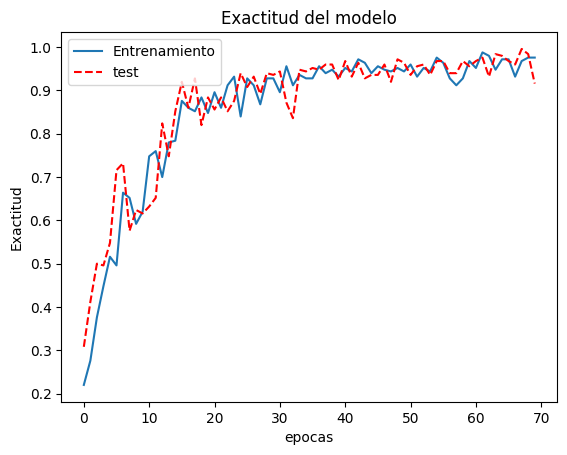

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

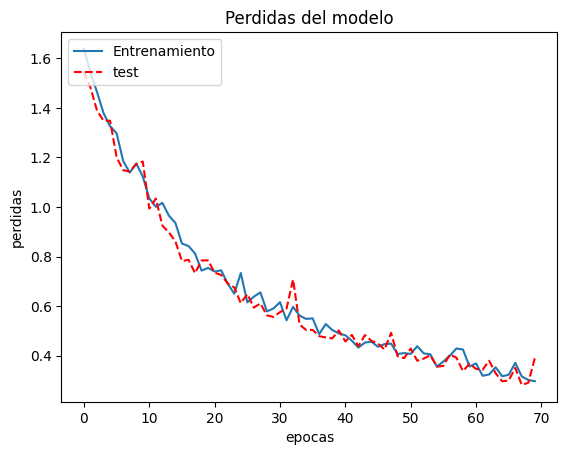

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()